In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
names=open('/content/drive/MyDrive/names.txt','r').read().splitlines()

In [ ]:
print(f"Total number of names: {len(names)}")
print(f"Sample names: {names[:10]}")

Total number of names: 32033
Sample names: ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


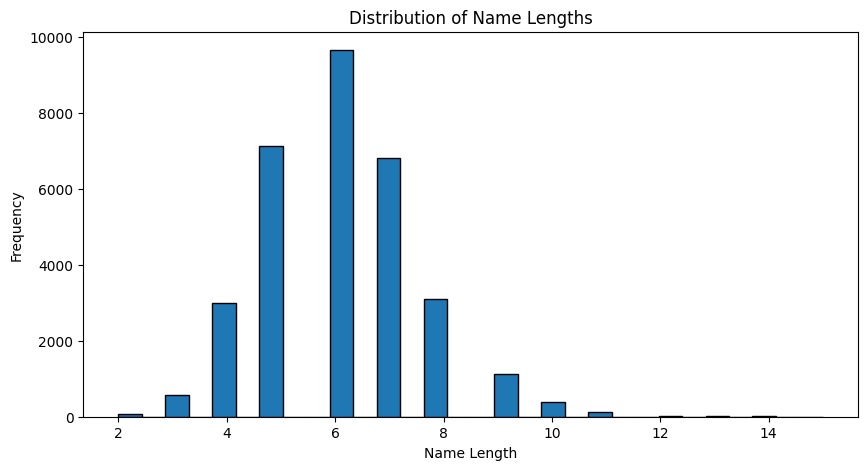

In [ ]:
name_lengths = [len(name) for name in names]
plt.figure(figsize=(10, 5))
plt.hist(name_lengths, bins=30, edgecolor='black')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.title('Distribution of Name Lengths')
plt.show()

In [ ]:
print(f"Average name length: {np.mean(name_lengths):.2f}")
print(f"Max name length: {max(name_lengths)}")
print(f"Min name length: {min(name_lengths)}")

Average name length: 6.12
Max name length: 15
Min name length: 2


In [ ]:
all_chars = ''.join(names).lower()
char_freq = Counter(all_chars)
print(f"\nUnique characters: {len(char_freq)}")
print(f"Most common characters: {char_freq.most_common(10)}")


Unique characters: 26
Most common characters: [('a', 33885), ('e', 20423), ('n', 18327), ('i', 17701), ('l', 13958), ('r', 12700), ('y', 9776), ('s', 8106), ('o', 7934), ('h', 7616)]


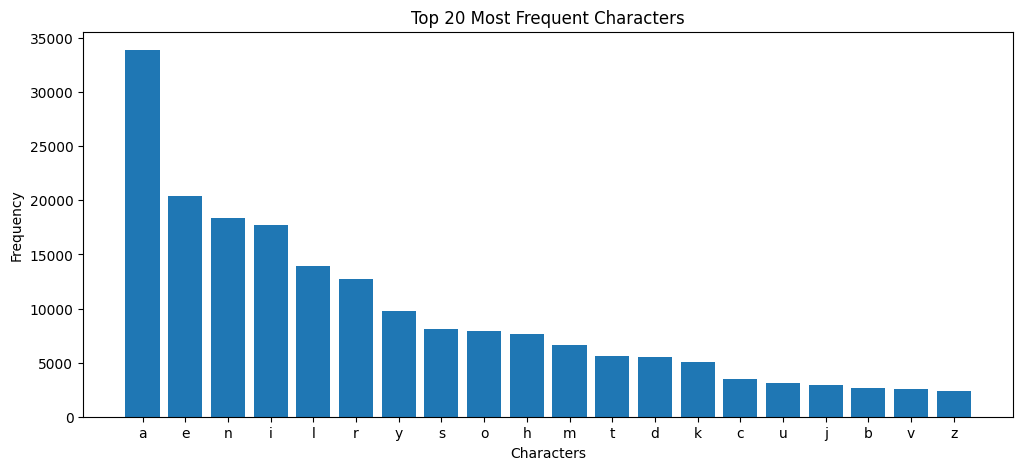

In [ ]:
chars, counts = zip(*char_freq.most_common(20))
plt.figure(figsize=(12, 5))
plt.bar(chars, counts)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Characters')
plt.show()

In [ ]:
chars = sorted(list(set(''.join(names))))
vocab_size = len(chars) + 1  # +1 for padding
print(f"Vocabulary size: {vocab_size}")
print(f"Characters: {''.join(chars)}")

Vocabulary size: 27
Characters: abcdefghijklmnopqrstuvwxyz


In [ ]:
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0  # Special token for start/end
itos = {i: ch for ch, i in stoi.items()}

print(f"\nCharacter to Index mapping: {stoi}")


Character to Index mapping: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [ ]:
context_length = 3

def build_dataset(names, context_length):
    X, Y = [], []

    for name in names:
        name = '.' * context_length + name + '.'
        for i in range(context_length, len(name)):
            # Get context (previous characters)
            context = name[i-context_length:i]
            # Get target (next character)
            target = name[i]

            # Convert to indices
            X.append([stoi[ch] for ch in context])
            Y.append(stoi[target])

    return np.array(X), np.array(Y)

In [ ]:
X, Y = build_dataset(names, context_length)
print(f"Dataset shape: X={X.shape}, Y={Y.shape}")
print(f"Sample input: {X[:5]}")
print(f"Sample output: {Y[:5]}")

Dataset shape: X=(228146, 3), Y=(228146,)
Sample input: [[ 0  0  0]
 [ 0  0  5]
 [ 0  5 13]
 [ 5 13 13]
 [13 13  1]]
Sample output: [ 5 13 13  1  0]


In [ ]:
n1 = int(0.8 * len(X))
n2 = int(0.9 * len(X))

X_train, Y_train = X[:n1], Y[:n1]
X_val, Y_val = X[n1:n2], Y[n1:n2]
X_test, Y_test = X[n2:], Y[n2:]

print(f"\nTrain size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 182516
Validation size: 22815
Test size: 22815


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
embedding_dim = 10
hidden_dim = 200
vocab_size = len(stoi)

In [ ]:
model = keras.Sequential([
    # Embedding layer
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                     input_length=context_length),

    # Flatten the embedded vectors
    layers.Flatten(),

    # First hidden layer
    layers.Dense(hidden_dim, activation='tanh'),

    # Second hidden layer (optional)
    layers.Dense(hidden_dim, activation='tanh'),

    # Output layer
    layers.Dense(vocab_size, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.2475 - loss: 2.4764 - val_accuracy: 0.2387 - val_loss: 2.6082
Epoch 2/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.2657 - loss: 2.3693 - val_accuracy: 0.2477 - val_loss: 2.5589
Epoch 3/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.2687 - loss: 2.3573 - val_accuracy: 0.2035 - val_loss: 2.6460
Epoch 4/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.2689 - loss: 2.3565 - val_accuracy: 0.2465 - val_loss: 2.5889
Epoch 5/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2687 - loss: 2.3589 - val_accuracy: 0.2166 - val_loss: 2.6053
Epoch 6/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2693 - loss: 2.3552 - val_accuracy: 0.2506 - val_loss: 2.5796
Epoch 7/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2717 - loss: 2.3557 - val_accuracy: 0.2156 - val_loss: 2.6190
Epoch 8/50
5704/5704 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2679 - loss: 2

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1947 - loss: 2.6618

Test Loss: 2.6829
Test Accuracy: 0.1942


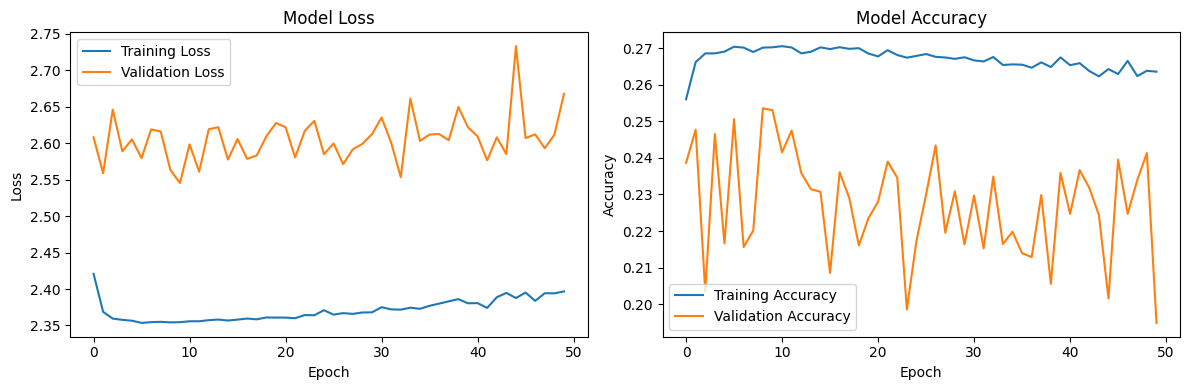

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def generate_name(model, context_length, max_length=20):
    """Generate a new name using the trained model"""
    # Start with context of padding characters
    context = [0] * context_length
    generated_name = []

    for _ in range(max_length):
        # Predict next character
        x = np.array([context])
        probs = model.predict(x, verbose=0)[0]

        # Sample from the probability distribution
        next_char_idx = np.random.choice(len(probs), p=probs)

        # Stop if we generate the end token
        if next_char_idx == 0:
            break

        # Add to generated name
        generated_name.append(itos[next_char_idx])

        # Update context
        context = context[1:] + [next_char_idx]

    return ''.join(generated_name)

In [ ]:
print("\nGenerated names:")
for i in range(10):
    print(generate_name(model, context_length))


Generated names:
atumodia
viana
nie
canioon
simost
chyra
ken
al
alirnel
gionthyloleiga


In [ ]:
train_loss = history.history['loss'][-1]
train_perplexity = np.exp(train_loss)
test_perplexity = np.exp(test_loss)

print(f"\nTrain Perplexity: {train_perplexity:.4f}")
print(f"Test Perplexity: {test_perplexity:.4f}")



Train Perplexity: 10.9869
Test Perplexity: 14.6273


In [ ]:
embedding_weights = model.layers[0].get_weights()[0]
print(f"\nEmbedding shape: {embedding_weights.shape}")


Embedding shape: (27, 10)


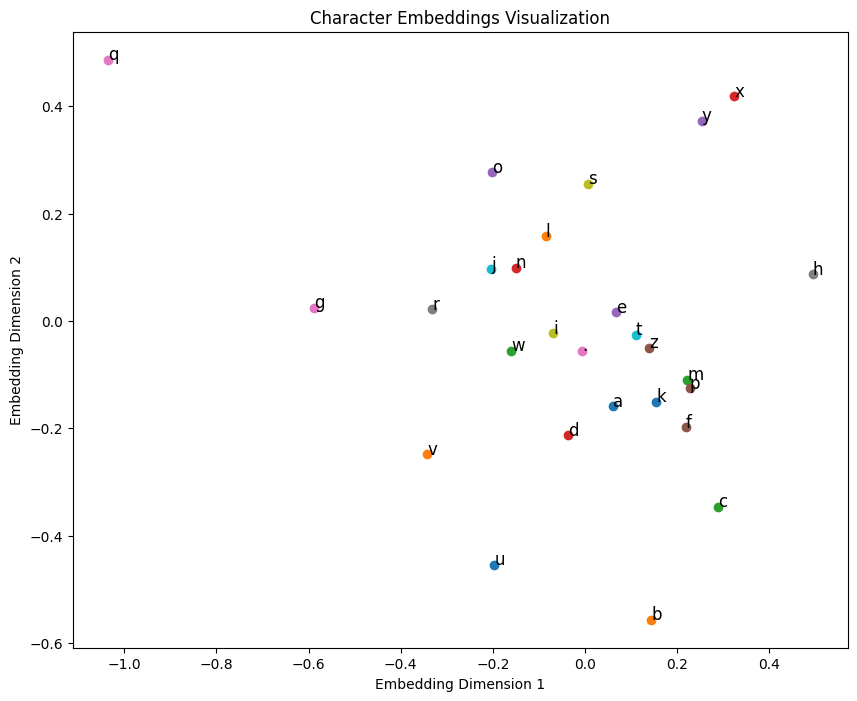

In [ ]:
plt.figure(figsize=(10, 8))
for i, char in itos.items():
    if i < len(embedding_weights):
        x, y = embedding_weights[i, 0], embedding_weights[i, 1]
        plt.scatter(x, y)
        plt.text(x, y, char, fontsize=12)
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('Character Embeddings Visualization')
plt.show()

In [ ]:
model.save('character_mlp_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
import pickle
with open('vocabulary.pkl', 'wb') as f:
    pickle.dump({'stoi': stoi, 'itos': itos}, f)
print("Vocabulary saved successfully!")

Vocabulary saved successfully!
